###### Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Daniel Koehn based on Jupyter notebooks by Marc Spiegelman [Dynamical Systems APMA 4101](https://github.com/mspieg/dynamical-systems) and  Kyle Mandli from his course [Introduction to numerical methods](https://github.com/mandli/intro-numerical-methods), notebook style sheet by L.A. Barba, N.C. Clementi [Engineering Computations](https://github.com/engineersCode)

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Stationary Solutions of Time-Dependent Problems

Often, we do not want to compute the whole time evolution of a dynamical problem, but are only interested in **stationary solutions**, where the system reached an equilibrium state. These stationary solutions are estimated by setting all time derivatives in the differential equation to zero. As examples, we will compute the stationary solutions for streamlines from [Exercise: How to sail without wind](https://nbviewer.jupyter.org/github/daniel-koehn/Differential-equations-earth-system/blob/master/02_finite_difference_intro/3_fd_ODE_example_sailing_wo_wind.ipynb) and the Lorenz equations.

## Stationary Solutions of Streamlines

In [Exercise: How to sail without wind](https://nbviewer.jupyter.org/github/daniel-koehn/Differential-equations-earth-system/blob/master/02_finite_difference_intro/3_fd_ODE_example_sailing_wo_wind.ipynb), we computed streamlines for a given velocity vector field ${\bf{V}} = (v_x,v_y)^T$, starting from an initial position ${\bf{x_0}} = (x_0,y_0)^T$. The governing equations related componentwise the velocity field to the spatial coordinates ${\bf{x}} = (x,y)^T$ by 

\begin{equation}
v_x = \frac{dx}{dt},\; v_y = \frac{dy}{dt} \tag{1}
\end{equation}

To find the stationary solutions of differential eqs. (1), we have to set the time derivatives on the RHS to zero $\frac{dx}{dt}=0$, $\frac{dy}{dt}=0$ leading to 

\begin{equation}
v_x = 0,\; v_y = 0 \tag{2}
\end{equation}

Eqs. (2) simply state that a stationary solution is located at points, where the velocity field is zero or we can not change the system state, because no fluid flow exists. To explicitly calculate the stationary solutions of eqs.(1), also known as **Fixpoints**, we have to explicitly define the velocity field ${\bf{V}} = (v_x,v_y)^T$. 

##### Exercise 1

Compute the fixpoints ${\bf{x_{fix}}} = (x_{fix},y_{fix})^T$ for the velocity fields 

\begin{equation}
{\bf{V_1}} = (y/1000,-x/1000)^T \notag
\end{equation}

and

\begin{equation}
{\bf{V_2}}=(cos((x+y)/500),sin((x-y)/500))^T \notag
\end{equation}

- How many fixpoints exist for each velocity field $\bf{V_1}$, $\bf{V_2}$? 
- Mark all fixpoint positions on the square $-1000 \le x \le 1000;\; -1000 \le y \le 1000$ by red dots in the vector plots below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

# define font size
FSize = 18
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize)

In [3]:
# define functions to compute the vector fields V1 and V2
# compute velocity components V = (vx,vy)^T at position x,y
def vel_xy_1(x,y):
    
    vx = y / 1000.
    vy = -x / 1000.
    
    return vx, vy

def vel_xy_2(x,y):
    
    vx = np.cos((x+y)/500)
    vy = np.sin((x-y)/500)    
    
    return vx, vy

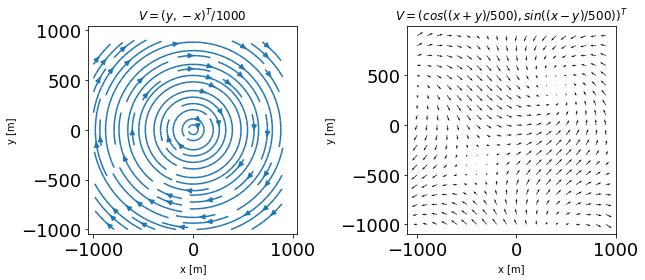

In [4]:
# Plot velocity vector fields
# Define figure size
rcParams['figure.figsize'] = 9, 4

# Define coordinates
dh = 100.
x1 = -1000.
x2 = 1000.
X, Y = np.meshgrid(np.arange(x1, x2, dh), np.arange(x1, x2, dh))

# Plot vector field V1
# --------------------
ax1 = plt.subplot(1, 2, 1)

# Define vector field components for coordinates X,Y
VX1,VY1 = vel_xy_1(X,Y)

ax1.set_title(r'$V=(y,-x)^T/1000$')
plt.axis('equal')
Q = plt.streamplot(X,Y,VX1,VY1)
# PLOT FIXPOINT POSITIONS HERE!

plt.xlabel('x [m]')
plt.ylabel('y [m]')

# Plot vector field V2
# --------------------
ax2 = plt.subplot(1, 2, 2)

# Define vector field components for coordinates X,Y
VX2,VY2 = vel_xy_2(X,Y)

ax2.set_title(r'$V=(cos((x+y)/500),sin((x-y)/500))^T$')
plt.axis('equal')
Q = plt.quiver(X,Y,VX2,VY2)
# PLOT FIXPOINT POSITIONS HERE!

plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.tight_layout()
plt.show()

##### Exercise 2

Compute the fixpoints ${\bf{x_{fix}}} = (X_{fix},Y_{fix},Z_{fix})^T$ for the Lorenz equations:

\begin{equation}
\begin{split}
\frac{\partial X}{\partial t} &= \sigma( Y - X)\\
\frac{\partial Y}{\partial t} &= rX - Y - XZ \\
\frac{\partial Z}{\partial t} &= XY -b Z
\end{split}
\notag
\end{equation}

where $\sigma$ denotes the "Prandtl number",  $r = \mathrm{Ra}/\mathrm{Ra}_c$ is a scaled "Rayleigh number" and $b$ is a parameter that is related to the the aspect ratio of a convecting cell in the original derivation.

- How many fixpoints exist? 
- Use the fixpoint solutions $X_{fix}$, $Y_{fix}$ and $Z_{fix}$ to plot the corresponding streamfunction $\psi(x,z)$, temperature field $T(x,z)$ and velocity vector field ${\bf{v}}$

\begin{equation}
\begin{split}
\psi(x,z) &= X_{fix} \sin(a\pi x)\sin(\pi z)\\
T(x,z) &= Y_{fix} \cos(a\pi x)\sin(\pi z) - Z_{fix} \sin(2\pi z) + (1-z)\\
{\bf{v}} &=(u,0,w) = {\bf{\nabla\times\psi\hat{j}}}=(-\frac{\partial\psi}{\partial z}, 0,  \frac{\partial\psi}{\partial x})^T\\
\end{split}
\notag
\end{equation}

for $b=8/3$ and scaled Rayleigh numbers $r=0.5$ and $r=28$, respectively.

- Describe and interpret the different Fixpoint solutions

In [ ]:
# Define coordinates
a = np.sqrt(0.5)
x0 = np.linspace(0,1./a,20)
z0 = np.linspace(0.,1.,20)
x,z = np.meshgrid(x0,z0)

# Define spatial part of streamfunction and temperature field
psi = np.sin(a*np.pi*x)*np.sin(np.pi*z)
theta0 = np.cos(a*np.pi*x)*np.sin(np.pi*z)
theta1 = -np.sin(2.*np.pi*z)

## Fixpoints of Lorenz Equations (r = 0.5)

PLOT VECTORFIELD $V = (U,V)^T$ AND TEMPERATURE $T$ FOR ALL FIXPOINT SOLUTIONS WITH $r=0.5$ HERE! PRODUCE A NEW PLOT FOR EACH FIXPOINT!

In [ ]:
# Define figure size
plt.figure()
plt.figure(figsize=(20,20))

# DEFINE FIXPOINT HERE!
b = 8/3
r = 0.5

Xfix = 
Yfix = 
Zfix = 

# Initial Streamfunction psi and velocity field
plt.subplot(1,2,1)
plt.contourf(x,z,Xfix*psi,cmap='viridis_r')

# Velocity field
U = - Xfix * np.pi * np.sin(a*np.pi*x) * np.cos(np.pi*z)
V = Xfix * a * np.pi * np.cos(a*np.pi*x) * np.sin(np.pi*z)
plt.quiver(x,z,U,V)
plt.gca().set_aspect('equal')
plt.title('Streamfunction $\psi$', fontdict=font)

# Initial temperature field 
plt.subplot(1,2,2)
plt.contourf(x,z,Yfix*theta0 + Zfix*theta1 + (1-z),cmap='magma')
plt.gca().set_aspect('equal')
plt.title(r'Temperature $T$', fontdict=font)

plt.tight_layout()
plt.show()

## Fixpoints of Lorenz Equations (r = 28)

PLOT VECTORFIELD $V = (U,V)^T$ AND TEMPERATURE $T$ FOR ALL FIXPOINT SOLUTIONS WITH $r=28$ HERE! PRODUCE A NEW PLOT FOR EACH FIXPOINT!

In [ ]:
# Define figure size
plt.figure()
plt.figure(figsize=(20,20))

# DEFINE FIXPOINT HERE!
b = 8/3
r = 28

Xfix =
Yfix =
Zfix =

# Initial Streamfunction psi and velocity field
plt.subplot(1,2,1)
plt.contourf(x,z,Xfix*psi,cmap='viridis_r')

# Velocity field
U = - Xfix * np.pi * np.sin(a*np.pi*x) * np.cos(np.pi*z)
V = Xfix * a * np.pi * np.cos(a*np.pi*x) * np.sin(np.pi*z)
plt.quiver(x,z,U,V)
plt.gca().set_aspect('equal')
plt.title('Streamfunction $\psi$', fontdict=font)

# Initial temperature field 
plt.subplot(1,2,2)
plt.contourf(x,z,Yfix*theta0 + Zfix*theta1 + (1-z),cmap='magma')
plt.gca().set_aspect('equal')
plt.title(r'Temperature $T$', fontdict=font)

plt.tight_layout()
plt.show()

## What we learned:

- How to compute stationary solutions (fixpoints) of differential equations. 